In [1]:
import pandas as pd
import numpy as np

In [2]:
#Read in csvs, concatenate each years' unique dataframe together to consolidate data

arrestee_2020 = pd.read_csv("2020_NIBRS_ARRESTEE.csv")
arrestee_2019 = pd.read_csv("2019_NIBRS_ARRESTEE.csv")
arrestee_2018 = pd.read_csv("2018_NIBRS_ARRESTEE.csv")
arrestee_2017 = pd.read_csv("2017_NIBRS_ARRESTEE.csv")
arrestee_frames = [arrestee_2020,arrestee_2019,arrestee_2018,arrestee_2017]
arrestee_all = pd.concat(arrestee_frames)
#arrestee_all.head()

incident_2020 = pd.read_csv("2020_NIBRS_incident.csv")
incident_2019 = pd.read_csv("2019_NIBRS_incident.csv")
incident_2018 = pd.read_csv("2018_NIBRS_incident.csv")
incident_2017 = pd.read_csv("2017_NIBRS_incident.csv")
incident_frames = [incident_2020,incident_2019,incident_2018,incident_2017]
incident_all = pd.concat(incident_frames)
#incident_all.head()

offense_2020 = pd.read_csv("2020_NIBRS_OFFENSE.csv")
offense_2019 = pd.read_csv("2019_NIBRS_OFFENSE.csv")
offense_2018 = pd.read_csv("2018_NIBRS_OFFENSE.csv")
offense_2017 = pd.read_csv("2017_NIBRS_OFFENSE.csv")
offense_frames = [offense_2020,offense_2019,offense_2018,offense_2017]
offense_all = pd.concat(offense_frames)
#offense_all.head()

using_2020 = pd.read_csv("2020_NIBRS_SUSPECT_USING.csv")
using_2019 = pd.read_csv("2019_NIBRS_SUSPECT_USING.csv")
using_2018 = pd.read_csv("2018_NIBRS_SUSPECT_USING.csv")
using_2017 = pd.read_csv("2017_NIBRS_SUSPECT_USING.csv")
using_frames = [using_2020,using_2019,using_2018,using_2017]
using_all = pd.concat(using_frames)

agency_2020 = pd.read_csv("2020_agencies.csv")

offense_type = pd.read_csv('NIBRS_OFFENSE_TYPE.csv')
offense_type = offense_type[['OFFENSE_TYPE_ID','OFFENSE_NAME','CRIME_AGAINST','OFFENSE_CATEGORY_NAME']]


C:\Users\becky\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# Include only relevant columns to the dataframe and rename the demographic columns to differentiate between
# arrestee info and victims'

arrestee_all = arrestee_all[['OFFENSE_TYPE_ID','ARREST_DATE','AGE_NUM','SEX_CODE','RACE_ID','RESIDENT_CODE',
                             'MULTIPLE_INDICATOR','ARRESTEE_ID','INCIDENT_ID']]
arrestee_all = arrestee_all.rename(columns={'AGE_NUM': 'ARR_AGE_NUM', 
                                          'SEX_CODE': 'ARR_SEX_CODE','RACE_ID':'ARR_RACE_ID',
                                          'RESIDENT_CODE':'ARR_RESIDENT_CODE'})
arrestee_all.head()

,OFFENSE_TYPE_ID,ARREST_DATE,ARR_AGE_NUM,ARR_SEX_CODE,ARR_RACE_ID,ARR_RESIDENT_CODE,MULTIPLE_INDICATOR,ARRESTEE_ID,INCIDENT_ID
0,27,09-DEC-20,86.0,M,1,R,N,41972966,135853809
1,51,24-DEC-20,33.0,M,1,R,N,41975901,135853845
2,51,09-FEB-21,28.0,M,1,R,N,41976088,135857893
3,27,26-FEB-21,30.0,M,1,R,N,41984629,135878943
4,16,05-FEB-21,31.0,F,2,NaN,N,41981770,135888488


In [6]:
#Remove any records with NaN values
arrestee_all.dropna(inplace=True)
arrestee_all.count()

OFFENSE_TYPE_ID       589117
ARREST_DATE           589117
ARR_AGE_NUM           589117
ARR_SEX_CODE          589117
ARR_RACE_ID           589117
ARR_RESIDENT_CODE     589117
MULTIPLE_INDICATOR    589117
ARRESTEE_ID           589117
INCIDENT_ID           589117
dtype: int64

In [7]:
# Include only relevant columns to the dataframe
incident_all = incident_all[['INCIDENT_DATE','INCIDENT_HOUR','AGENCY_ID',
                             'CLEARED_EXCEPT_ID','INCIDENT_ID']]
incident_all.head()

,INCIDENT_DATE,INCIDENT_HOUR,AGENCY_ID,CLEARED_EXCEPT_ID,INCIDENT_ID
0,08-DEC-20,11.0,29534,5,133835511
1,14-DEC-20,16.0,29534,5,133835521
2,07-DEC-20,16.0,29534,5,133831060
3,03-MAR-20,16.0,29534,5,123548684
4,04-MAR-20,15.0,29534,5,123548754


In [8]:
incident_all.count()

INCIDENT_DATE        2906333
INCIDENT_HOUR        2760264
AGENCY_ID            2906333
CLEARED_EXCEPT_ID    2906333
INCIDENT_ID          2906333
dtype: int64

In [9]:
#Remove any records with NaN values
incident_all.dropna(inplace=True)
incident_all.count()

INCIDENT_DATE        2760264
INCIDENT_HOUR        2760264
AGENCY_ID            2760264
CLEARED_EXCEPT_ID    2760264
INCIDENT_ID          2760264
dtype: int64

In [10]:
# Merge the arrestee and incident table together
merge_1 = pd.merge(incident_all,arrestee_all, on = "INCIDENT_ID")
merge_1.head()

,INCIDENT_DATE,INCIDENT_HOUR,AGENCY_ID,CLEARED_EXCEPT_ID,INCIDENT_ID,OFFENSE_TYPE_ID,ARREST_DATE,ARR_AGE_NUM,ARR_SEX_CODE,ARR_RACE_ID,ARR_RESIDENT_CODE,MULTIPLE_INDICATOR,ARRESTEE_ID
0,05-MAR-20,16.0,29534,6,123552261,51,05-MAR-20,16.0,M,2,N,N,38226638
1,06-MAR-20,7.0,29534,6,123548789,16,06-MAR-20,30.0,M,1,N,N,38226642
2,06-JAN-20,14.0,29534,6,120586453,51,06-JAN-20,14.0,M,1,N,N,36859961
3,06-MAR-20,19.0,29534,6,123548843,51,06-MAR-20,13.0,M,1,N,N,38226658
4,04-MAR-20,10.0,29534,6,123548696,16,04-MAR-20,14.0,F,1,N,N,38223991


In [11]:
merge_1.count()

INCIDENT_DATE         578554
INCIDENT_HOUR         578554
AGENCY_ID             578554
CLEARED_EXCEPT_ID     578554
INCIDENT_ID           578554
OFFENSE_TYPE_ID       578554
ARREST_DATE           578554
ARR_AGE_NUM           578554
ARR_SEX_CODE          578554
ARR_RACE_ID           578554
ARR_RESIDENT_CODE     578554
MULTIPLE_INDICATOR    578554
ARRESTEE_ID           578554
dtype: int64

In [12]:
# Include only relevant columns to the dataframe
offense_all = offense_all[['INCIDENT_ID','OFFENSE_ID','LOCATION_ID']]
offense_all.head()

,INCIDENT_ID,OFFENSE_ID,LOCATION_ID
0,124796257,151187996,20
1,124796312,151183350,20
2,124796411,151188163,20
3,124796411,151188162,20
4,124796494,151183579,20


In [13]:
offense_all.count()

INCIDENT_ID    3132530
OFFENSE_ID     3132530
LOCATION_ID    3132530
dtype: int64

In [14]:
# Merge the arrestee/incident dataframe with the offenses dataframe
merge_2 = pd.merge(merge_1,offense_all, on = "INCIDENT_ID")
merge_2.head()

,INCIDENT_DATE,INCIDENT_HOUR,AGENCY_ID,CLEARED_EXCEPT_ID,INCIDENT_ID,OFFENSE_TYPE_ID,ARREST_DATE,ARR_AGE_NUM,ARR_SEX_CODE,ARR_RACE_ID,ARR_RESIDENT_CODE,MULTIPLE_INDICATOR,ARRESTEE_ID,OFFENSE_ID,LOCATION_ID
0,05-MAR-20,16.0,29534,6,123552261,51,05-MAR-20,16.0,M,2,N,N,38226638,149713571,41
1,06-MAR-20,7.0,29534,6,123548789,16,06-MAR-20,30.0,M,1,N,N,38226642,149716817,41
2,06-MAR-20,7.0,29534,6,123548789,16,06-MAR-20,30.0,M,1,N,N,38226642,149713579,41
3,06-JAN-20,14.0,29534,6,120586453,51,06-JAN-20,14.0,M,1,N,N,36859961,146055838,41
4,06-MAR-20,19.0,29534,6,123548843,51,06-MAR-20,13.0,M,1,N,N,38226658,149716869,41


In [15]:
# multiple locations may be asscoiated with an overall arrestee event so our dataframe has increased
print(merge_1.count())
print(merge_2.count())

INCIDENT_DATE         578554
INCIDENT_HOUR         578554
AGENCY_ID             578554
CLEARED_EXCEPT_ID     578554
INCIDENT_ID           578554
OFFENSE_TYPE_ID       578554
ARREST_DATE           578554
ARR_AGE_NUM           578554
ARR_SEX_CODE          578554
ARR_RACE_ID           578554
ARR_RESIDENT_CODE     578554
MULTIPLE_INDICATOR    578554
ARRESTEE_ID           578554
dtype: int64
INCIDENT_DATE         694465
INCIDENT_HOUR         694465
AGENCY_ID             694465
CLEARED_EXCEPT_ID     694465
INCIDENT_ID           694465
OFFENSE_TYPE_ID       694465
ARREST_DATE           694465
ARR_AGE_NUM           694465
ARR_SEX_CODE          694465
ARR_RACE_ID           694465
ARR_RESIDENT_CODE     694465
MULTIPLE_INDICATOR    694465
ARRESTEE_ID           694465
OFFENSE_ID            694465
LOCATION_ID           694465
dtype: int64


In [16]:
using_all.head()

,DATA_YEAR,SUSPECT_USING_ID,OFFENSE_ID
0,2020,4,162613628
1,2020,4,162609062
2,2020,4,162609076
3,2020,4,162609075
4,2020,4,162613686


In [17]:
#convert the suspect using id to a binary
using_all['SUSPECT_USING_ID'].replace({1:1, 3:1, 2:0,4:0}, inplace=True)
using_all.head()

,DATA_YEAR,SUSPECT_USING_ID,OFFENSE_ID
0,2020,0,162613628
1,2020,0,162609062
2,2020,0,162609076
3,2020,0,162609075
4,2020,0,162613686


In [18]:
# Merge the arrestee/incident/offense dataframe with the suspect using dataframe
merge_3 = pd.merge(merge_2,using_all, on = "OFFENSE_ID")
merge_3.head()

,INCIDENT_DATE,INCIDENT_HOUR,AGENCY_ID,CLEARED_EXCEPT_ID,INCIDENT_ID,OFFENSE_TYPE_ID,ARREST_DATE,ARR_AGE_NUM,ARR_SEX_CODE,ARR_RACE_ID,ARR_RESIDENT_CODE,MULTIPLE_INDICATOR,ARRESTEE_ID,OFFENSE_ID,LOCATION_ID,DATA_YEAR,SUSPECT_USING_ID
0,05-MAR-20,16.0,29534,6,123552261,51,05-MAR-20,16.0,M,2,N,N,38226638,149713571,41,2020,0
1,06-MAR-20,7.0,29534,6,123548789,16,06-MAR-20,30.0,M,1,N,N,38226642,149716817,41,2020,0
2,06-MAR-20,7.0,29534,6,123548789,16,06-MAR-20,30.0,M,1,N,N,38226642,149713579,41,2020,0
3,06-JAN-20,14.0,29534,6,120586453,51,06-JAN-20,14.0,M,1,N,N,36859961,146055838,41,2020,0
4,06-MAR-20,19.0,29534,6,123548843,51,06-MAR-20,13.0,M,1,N,N,38226658,149716869,41,2020,0


In [19]:
# since there are multiple locations, there may be mutliple using status 
#assoicated with each location per arrestee, per incident
print(merge_1.count())
print(merge_2.count())
print(merge_3.count())

INCIDENT_DATE         578554
INCIDENT_HOUR         578554
AGENCY_ID             578554
CLEARED_EXCEPT_ID     578554
INCIDENT_ID           578554
OFFENSE_TYPE_ID       578554
ARREST_DATE           578554
ARR_AGE_NUM           578554
ARR_SEX_CODE          578554
ARR_RACE_ID           578554
ARR_RESIDENT_CODE     578554
MULTIPLE_INDICATOR    578554
ARRESTEE_ID           578554
dtype: int64
INCIDENT_DATE         694465
INCIDENT_HOUR         694465
AGENCY_ID             694465
CLEARED_EXCEPT_ID     694465
INCIDENT_ID           694465
OFFENSE_TYPE_ID       694465
ARREST_DATE           694465
ARR_AGE_NUM           694465
ARR_SEX_CODE          694465
ARR_RACE_ID           694465
ARR_RESIDENT_CODE     694465
MULTIPLE_INDICATOR    694465
ARRESTEE_ID           694465
OFFENSE_ID            694465
LOCATION_ID           694465
dtype: int64
INCIDENT_DATE         702030
INCIDENT_HOUR         702030
AGENCY_ID             702030
CLEARED_EXCEPT_ID     702030
INCIDENT_ID           702030
OFFENSE_TYPE_ID  

In [20]:
agency_2020.head()

,YEARLY_AGENCY_ID,AGENCY_ID,DATA_YEAR,ORI,LEGACY_ORI,COVERED_BY_LEGACY_ORI,DIRECT_CONTRIBUTOR_FLAG,DORMANT_FLAG,DORMANT_YEAR,REPORTING_TYPE,...,NIBRS_LEOKA_START_DATE,NIBRS_CT_START_DATE,NIBRS_MULTI_BIAS_START_DATE,NIBRS_OFF_ETH_START_DATE,COVERED_FLAG,COUNTY_NAME,MSA_NAME,PUBLISHABLE_FLAG,PARTICIPATED,NIBRS_PARTICIPATED
0,187532020,18753,2020,TX0010100,TX0010100,NaN,N,N,NaN,I,...,01-FEB-17,01-DEC-17,01-DEC-17,01-DEC-17,N,ANDERSON,Non-MSA,Y,Y,Y
1,187542020,18754,2020,TX0010300,TX0010300,NaN,N,N,NaN,I,...,01-OCT-16,01-OCT-16,01-OCT-16,01-OCT-16,N,HENDERSON; ANDERSON,Non-MSA,Y,Y,Y
2,187572020,18757,2020,TX0020100,TX0020100,NaN,N,N,NaN,I,...,01-MAY-19,01-JUL-19,01-JUL-19,01-JUL-19,N,ANDREWS,Non-MSA,Y,Y,Y
3,187592020,18759,2020,TX0030100,TX0030100,NaN,N,N,NaN,I,...,01-MAR-19,01-MAY-19,01-MAY-19,01-MAY-19,N,ANGELINA,Non-MSA,Y,Y,Y
4,187602020,18760,2020,TX0030200,TX0030200,NaN,N,N,NaN,I,...,01-OCT-18,01-FEB-19,01-FEB-19,01-FEB-19,N,ANGELINA,Non-MSA,Y,Y,Y


In [21]:
agency_2020=agency_2020[['AGENCY_ID',
        'AGENCY_TYPE_NAME', 'POPULATION', 'SUBURBAN_AREA_FLAG',
        'PED.MALE_OFFICER+PED.MALE_CIVILIAN',
        'PED.FEMALE_CIVILIAN+PED.FEMALE_OFFICER']]
agency_2020['SUBURBAN_AREA_FLAG'].replace({'N':1, 'Y':2}, inplace=True)

agency_2020 = agency_2020.rename(columns={'PED.MALE_OFFICER+PED.MALE_CIVILIAN': 'MALE_EMPLOYEES', 
                        'PED.FEMALE_CIVILIAN+PED.FEMALE_OFFICER':'FEMALE_EMPLOYEES'})
agency_2020['TOTAL_EMPLOYEES'] = agency_2020['MALE_EMPLOYEES']+agency_2020['FEMALE_EMPLOYEES']

agency_2020=agency_2020[['AGENCY_ID','AGENCY_TYPE_NAME', 'POPULATION', 'SUBURBAN_AREA_FLAG','TOTAL_EMPLOYEES']]

agency_2020.head()

,AGENCY_ID,AGENCY_TYPE_NAME,POPULATION,SUBURBAN_AREA_FLAG,TOTAL_EMPLOYEES
0,18753,City,17625,1,43.0
1,18754,City,1164,1,5.0
2,18757,City,14487,1,19.0
3,18759,City,5182,1,17.0
4,18760,City,2110,1,6.0


In [22]:
merge_4 = pd.merge(merge_3,agency_2020,on="AGENCY_ID")
merge_4.head()

,INCIDENT_DATE,INCIDENT_HOUR,AGENCY_ID,CLEARED_EXCEPT_ID,INCIDENT_ID,OFFENSE_TYPE_ID,ARREST_DATE,ARR_AGE_NUM,ARR_SEX_CODE,ARR_RACE_ID,...,MULTIPLE_INDICATOR,ARRESTEE_ID,OFFENSE_ID,LOCATION_ID,DATA_YEAR,SUSPECT_USING_ID,AGENCY_TYPE_NAME,POPULATION,SUBURBAN_AREA_FLAG,TOTAL_EMPLOYEES
0,05-MAR-20,16.0,29534,6,123552261,51,05-MAR-20,16.0,M,2,...,N,38226638,149713571,41,2020,0,Other,0,2,118.0
1,06-MAR-20,7.0,29534,6,123548789,16,06-MAR-20,30.0,M,1,...,N,38226642,149716817,41,2020,0,Other,0,2,118.0
2,06-MAR-20,7.0,29534,6,123548789,16,06-MAR-20,30.0,M,1,...,N,38226642,149713579,41,2020,0,Other,0,2,118.0
3,06-JAN-20,14.0,29534,6,120586453,51,06-JAN-20,14.0,M,1,...,N,36859961,146055838,41,2020,0,Other,0,2,118.0
4,06-MAR-20,19.0,29534,6,123548843,51,06-MAR-20,13.0,M,1,...,N,38226658,149716869,41,2020,0,Other,0,2,118.0


In [23]:
# The amoount of rows of data decreases because some records may not have mapped to a single agency id
print(merge_1['INCIDENT_DATE'].count())
print(merge_2['INCIDENT_DATE'].count())
print(merge_3['INCIDENT_DATE'].count())
print(merge_4['INCIDENT_DATE'].count())

578554
694465
702030
701957


In [24]:
# Keep only the relevant columns for the analysis
merge_4.columns

merge_4['INCIDENT_DATE'] = pd.to_datetime(merge_4['INCIDENT_DATE'])
merge_4['INCIDENT_MONTH'] = pd.DatetimeIndex(merge_4['INCIDENT_DATE']).month

df = merge_4[['INCIDENT_MONTH','INCIDENT_HOUR','ARR_AGE_NUM',
       'ARR_SEX_CODE', 'ARR_RACE_ID', 'ARR_RESIDENT_CODE','LOCATION_ID',
       'SUSPECT_USING_ID', 'AGENCY_TYPE_NAME', 'POPULATION',
       'SUBURBAN_AREA_FLAG', 'TOTAL_EMPLOYEES','OFFENSE_TYPE_ID','AGENCY_ID']]
df.head()

,INCIDENT_MONTH,INCIDENT_HOUR,ARR_AGE_NUM,ARR_SEX_CODE,ARR_RACE_ID,ARR_RESIDENT_CODE,LOCATION_ID,SUSPECT_USING_ID,AGENCY_TYPE_NAME,POPULATION,SUBURBAN_AREA_FLAG,TOTAL_EMPLOYEES,OFFENSE_TYPE_ID,AGENCY_ID
0,3,16.0,16.0,M,2,N,41,0,Other,0,2,118.0,51,29534
1,3,7.0,30.0,M,1,N,41,0,Other,0,2,118.0,16,29534
2,3,7.0,30.0,M,1,N,41,0,Other,0,2,118.0,16,29534
3,1,14.0,14.0,M,1,N,41,0,Other,0,2,118.0,51,29534
4,3,19.0,13.0,M,1,N,41,0,Other,0,2,118.0,51,29534


In [25]:
df['ARR_SEX_CODE'].replace({'M':1, 'F':2}, inplace=True)
df['ARR_RESIDENT_CODE'].replace({'N':1, 'R':2, 'U':0}, inplace=True)
df['AGENCY_TYPE_NAME'].replace({'City':1, 'County':2, 'Other':0,'University or College':0, 'Tribal':0}, inplace=True)
df.head()

C:\Users\becky\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,INCIDENT_MONTH,INCIDENT_HOUR,ARR_AGE_NUM,ARR_SEX_CODE,ARR_RACE_ID,ARR_RESIDENT_CODE,LOCATION_ID,SUSPECT_USING_ID,AGENCY_TYPE_NAME,POPULATION,SUBURBAN_AREA_FLAG,TOTAL_EMPLOYEES,OFFENSE_TYPE_ID,AGENCY_ID
0,3,16.0,16.0,1,2,1,41,0,0,0,2,118.0,51,29534
1,3,7.0,30.0,1,1,1,41,0,0,0,2,118.0,16,29534
2,3,7.0,30.0,1,1,1,41,0,0,0,2,118.0,16,29534
3,1,14.0,14.0,1,1,1,41,0,0,0,2,118.0,51,29534
4,3,19.0,13.0,1,1,1,41,0,0,0,2,118.0,51,29534


In [26]:
offense_type = offense_type[['OFFENSE_TYPE_ID','CRIME_AGAINST']]
df = pd.merge(df,offense_type, on='OFFENSE_TYPE_ID')
df['CRIME_AGAINST'].replace({'Person':1, 'Property':2, 'Society':3,'Not a Crime':0,}, inplace=True)
df.head()

,INCIDENT_MONTH,INCIDENT_HOUR,ARR_AGE_NUM,ARR_SEX_CODE,ARR_RACE_ID,ARR_RESIDENT_CODE,LOCATION_ID,SUSPECT_USING_ID,AGENCY_TYPE_NAME,POPULATION,SUBURBAN_AREA_FLAG,TOTAL_EMPLOYEES,OFFENSE_TYPE_ID,AGENCY_ID,CRIME_AGAINST
0,3,16.0,16.0,1,2,1,41,0,0,0,2,118.0,51,29534,1
1,1,14.0,14.0,1,1,1,41,0,0,0,2,118.0,51,29534,1
2,3,19.0,13.0,1,1,1,41,0,0,0,2,118.0,51,29534,1
3,1,14.0,11.0,1,1,1,41,0,0,0,2,118.0,51,29534,1
4,1,10.0,16.0,2,2,1,41,0,0,0,2,118.0,51,29534,1


In [27]:
df.to_csv('Jan8_TX_data_for_ML.csv',index=False)

In [28]:
df.count()

INCIDENT_MONTH        701957
INCIDENT_HOUR         701957
ARR_AGE_NUM           701957
ARR_SEX_CODE          701957
ARR_RACE_ID           701957
ARR_RESIDENT_CODE     701957
LOCATION_ID           701957
SUSPECT_USING_ID      701957
AGENCY_TYPE_NAME      701957
POPULATION            701957
SUBURBAN_AREA_FLAG    701957
TOTAL_EMPLOYEES       683411
OFFENSE_TYPE_ID       701957
AGENCY_ID             701957
CRIME_AGAINST         701957
dtype: int64

In [29]:
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import accuracy_score

C:\Users\becky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CRIME_AGAINST', ylabel='count'>

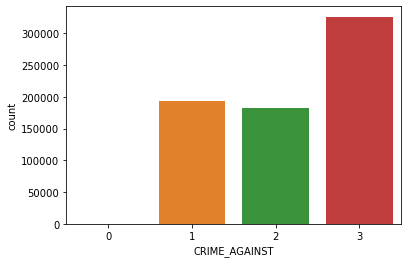

In [31]:
 sns.countplot(df['CRIME_AGAINST'])

C:\Users\becky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SUSPECT_USING_ID', ylabel='count'>

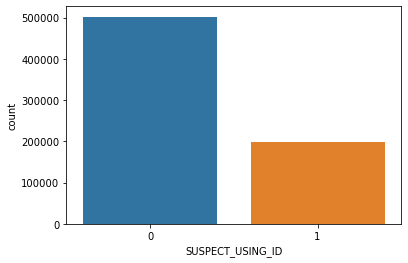

In [32]:
 sns.countplot(df['SUSPECT_USING_ID'])

C:\Users\becky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ARR_RESIDENT_CODE', ylabel='count'>

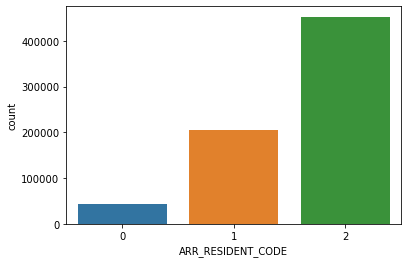

In [33]:
 sns.countplot(df['ARR_RESIDENT_CODE'])

C:\Users\becky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='INCIDENT_HOUR', ylabel='count'>

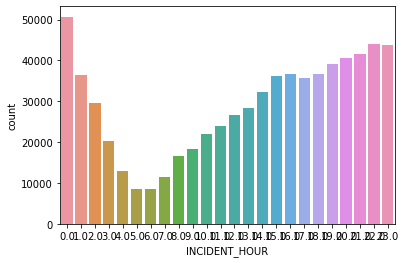

In [35]:
 sns.countplot(df['INCIDENT_HOUR'])   